In [1]:
from urllib.request import urlretrieve
urlretrieve(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv","winequality-white.csv"
)

('winequality-white.csv', <http.client.HTTPMessage at 0x1aa51442470>)

In [2]:
import pandas as pd
wine = pd.read_csv("winequality-white.csv", sep = ";", encoding="utf-8")
wine

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36           20.70      0.045   
1               6.3             0.300         0.34            1.60      0.049   
2               8.1             0.280         0.40            6.90      0.050   
3               7.2             0.230         0.32            8.50      0.058   
4               7.2             0.230         0.32            8.50      0.058   
5               8.1             0.280         0.40            6.90      0.050   
6               6.2             0.320         0.16            7.00      0.045   
7               7.0             0.270         0.36           20.70      0.045   
8               6.3             0.300         0.34            1.60      0.049   
9               8.1             0.220         0.43            1.50      0.044   
10              8.1             0.270         0.41            1.45      0.033   
11              8.6             0.230         0.40            4.20      0.035   
12              7.9             0.180         0.37            1.20      0.040   
13              6.6             0.160         0.40            1.50      0.044   
14              8.3             0.420         0.62           19.25      0.040   
15              6.6             0.170         0.38            1.50      0.032   
16              6.3             0.480         0.04            1.10      0.046   
17              6.2             0.660         0.48            1.20      0.029   
18              7.4             0.340         0.42            1.10      0.033   
19              6.5             0.310         0.14            7.50      0.044   
20              6.2             0.660         0.48            1.20      0.029   
21              6.4             0.310         0.38            2.90      0.038   
22              6.8             0.260         0.42            1.70      0.049   
23              7.6             0.670         0.14            1.50      0.074   
24              6.6             0.270         0.41            1.30      0.052   
25              7.0             0.250         0.32            9.00      0.046   
26              6.9             0.240         0.35            1.00      0.052   
27              7.0             0.280         0.39            8.70      0.051   
28              7.4             0.270         0.48            1.10      0.047   
29              7.2             0.320         0.36            2.00      0.033   
...             ...               ...          ...             ...        ...   
4868            5.8             0.230         0.31            4.50      0.046   
4869            6.6             0.240         0.33           10.10      0.032   
4870            6.1             0.320         0.28            6.60      0.021   
4871            5.0             0.200         0.40            1.90      0.015   
4872            6.0             0.420         0.41           12.40      0.032   
4873            5.7             0.210         0.32            1.60      0.030   
4874            5.6             0.200         0.36            2.50      0.048   
4875            7.4             0.220         0.26            1.20      0.035   
4876            6.2             0.380         0.42            2.50      0.038   
4877            5.9             0.540         0.00            0.80      0.032   
4878            6.2             0.530         0.02            0.90      0.035   
4879            6.6             0.340         0.40            8.10      0.046   
4880            6.6             0.340         0.40            8.10      0.046   
4881            5.0             0.235         0.27           11.75      0.030   
4882            5.5             0.320         0.13            1.30      0.037   
4883            4.9             0.470         0.17            1.90      0.035   
4884            6.5             0.330         0.38            8.30      0.048   
4885            6.6             0.340

In [5]:
wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

y=wine["quality"]
x = wine.drop('quality', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)
model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(model.score(x_test, y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.53      0.26      0.34        39
           5       0.66      0.67      0.67       295
           6       0.59      0.74      0.66       412
           7       0.72      0.46      0.56       195
           8       0.72      0.37      0.49        35

   micro avg       0.63      0.63      0.63       980
   macro avg       0.54      0.42      0.45       980
weighted avg       0.64      0.63      0.62       980

0.6285714285714286
0.6285714285714286


C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64


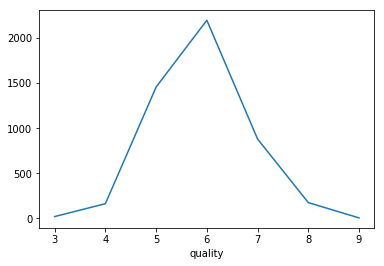

In [12]:
import matplotlib.pyplot as plt

count_data = wine.groupby('quality')["quality"].count()
print(count_data)

count_data.plot()
plt.savefig("wine-count-plt.png")
plt.show()

In [14]:
newlist = []
for v in list(y):
    if v <= 4:
        newlist += [0]
    elif v <= 7:
        newlist += [1]
    else:
        newlist += [2]
y = newlist

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980

   micro avg       1.00      1.00      1.00       980
   macro avg       1.00      1.00      1.00       980
weighted avg       1.00      1.00      1.00       980

1.0


C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [15]:
from sklearn.ensemble import GradientBoostingClassifier

y = wine["quality"]
x = wine.drop("quality", axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

clf = GradientBoostingClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.29      0.05      0.09        37
           5       0.66      0.60      0.63       299
           6       0.57      0.76      0.65       441
           7       0.52      0.32      0.40       167
           8       0.71      0.16      0.26        32

   micro avg       0.59      0.59      0.59       980
   macro avg       0.46      0.31      0.34       980
weighted avg       0.58      0.59      0.56       980

0.5857142857142857


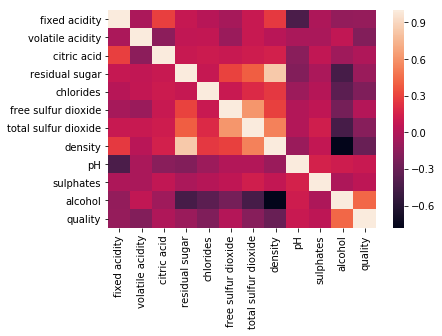

In [16]:
import seaborn as sns
corr = wine.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels = corr.columns.values)
plt.show()

In [17]:
newlist = []
for v in list(y):
    if v <= 4:
        newlist += [0]
    elif v <= 7:
        newlist += [1]
    else:
        newlist += [2]
y = newlist

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

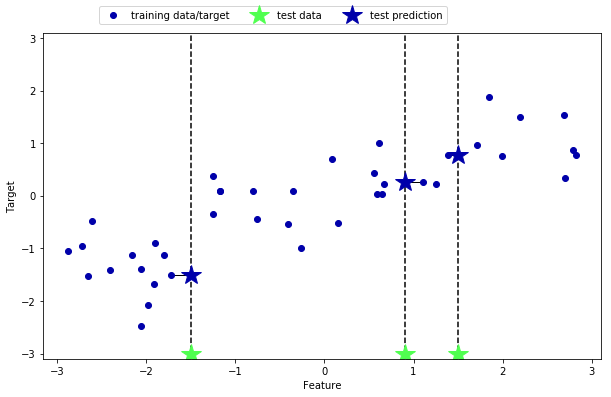

In [20]:
import mglearn
X, y = mglearn.datasets.make_wave(n_samples = 40)
mglearn.plots.plot_knn_regression(n_neighbors=1)

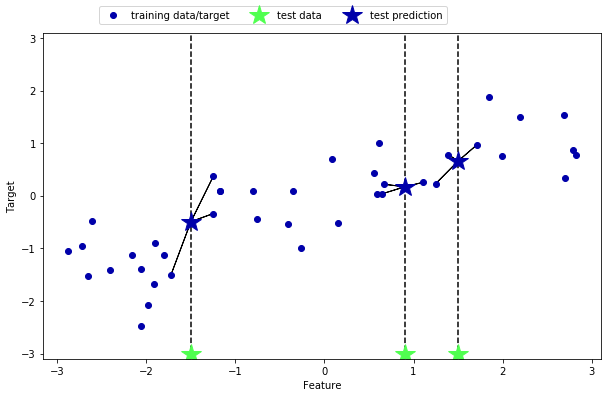

In [21]:
import mglearn
X, y = mglearn.datasets.make_wave(n_samples = 40)
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [240]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
print("테스트 세트 에측:\n",reg.predict(X_test))
print("테스트 세트 R^2: {:.2f}", format(reg.score(X_test, y_test)))

테스트 세트 에측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
테스트 세트 R^2: {:.2f} 0.8344172446249604


In [ ]:
line = np.